In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data= pd.read_csv(city_data_to_load)
ride_data= pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride= pd.merge(city_data,ride_data, on="city")
# Display the data table for preview
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
g= city_ride["type"].value_counts()
g

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [3]:
urban=city_ride[city_ride["type"]== "Urban"]
Suburban= city_ride[city_ride["type"]== "Suburban"]
Rural= city_ride[city_ride["type"]=="Rural"]

## Bubble Plot of Ride Sharing Data

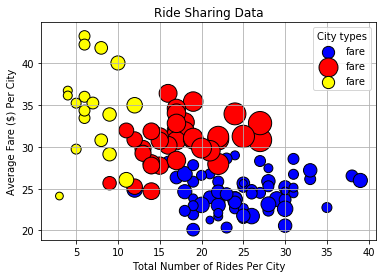

In [4]:
# Obtain the x and y coordinates for each of the three city types
urban_avgfare= urban.groupby(["city"])["fare"].mean()
urban_ridecount= urban.groupby(["city"])["ride_id"].count()
urban_drivercount= urban.groupby(["city"])["driver_count"].count()

suburban_avgfare= Suburban.groupby(["city"])["fare"].mean()
suburban_ridecount= Suburban.groupby(["city"])["ride_id"].count()
suburban_drivercount= Suburban.groupby(["city"])["driver_count"].count()

rural_avgfare= Rural.groupby(["city"])["fare"].mean()
rural_ridecount= Rural.groupby(["city"])["ride_id"].count()
rural_drivercount= Rural.groupby(["city"])["driver_count"].count()

# Build the scatter plots for each city types
plt.scatter(urban_ridecount,urban_avgfare, edgecolor= "black", facecolor="blue",  marker= "o", s= 20*rural_drivercount)

plt.scatter(suburban_ridecount,suburban_avgfare, edgecolor="black", facecolor= "red", marker="o", s= 20*suburban_drivercount)

plt.scatter(rural_ridecount,rural_avgfare, edgecolor= "black", facecolor= "yellow", marker="o", s= 20*rural_drivercount)
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")
plt.title("Ride Sharing Data")
plt.grid()
# Create a legend
plt.legend(title="City types")
# Incorporate a text label regarding circle size
plt.show()
# Save Figure


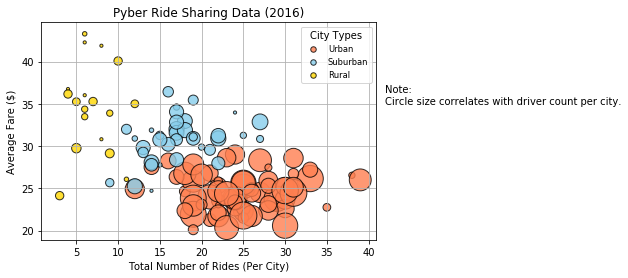

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

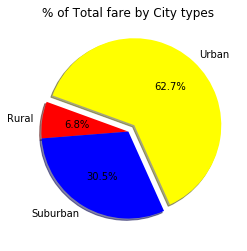

In [5]:
# Calculate Type Percents
total_fare= city_ride["fare"].sum()
type_fare= (city_ride.groupby(["type"])["fare"].sum() / total_fare)*100
# Build Pie Chart
plt.pie(type_fare, labels= ["Rural","Suburban", "Urban"], autopct= "%1.1f%%", shadow= True, startangle= 160, colors= ["Red","blue","yellow"], explode=[0,0,0.1])
plt.title("% of Total fare by City types")
# Save Figure
plt.show()

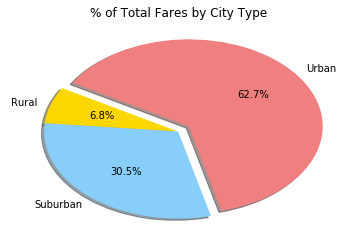

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

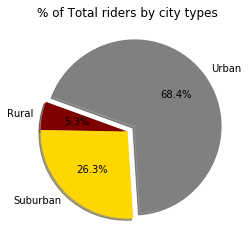

In [8]:
# Calculate Ride Percents
Tot_ride= city_ride["ride_id"].count()
rid= (city_ride.groupby(["type"])["ride_id"].count()/ Tot_ride)*100
# Build Pie Chart
plt.pie(rid, labels= ["Rural","Suburban", "Urban"], autopct= "%1.1f%%", shadow= True, startangle= 160, colors= ["maroon","gold","gray"], explode=[0,0,0.1])
plt.title("% of Total riders by city types")
# Save Figure
plt.show()

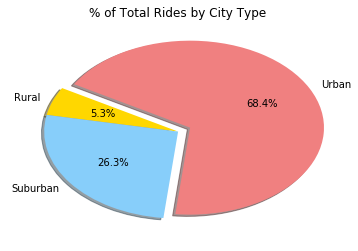

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

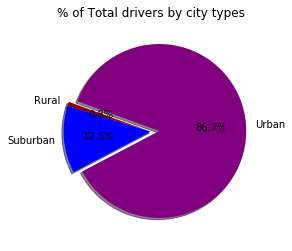

In [7]:
# Calculate Driver Percents
Tot_driver= city_ride["driver_count"].count()
dri= (city_ride.groupby(["type"])["driver_count"].sum()/Tot_driver)*100
# Build Pie Charts
plt.pie(dri, labels= ["Rural","Suburban", "Urban"], autopct= "%1.1f%%", shadow= True, startangle= 160, colors= ["darkred","blue","purple"], explode=[0,0,0.1])
plt.title("% of Total drivers by city types")
# Save Figure
plt.show()

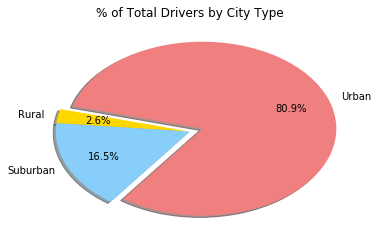

In [6]:
# Show Figure
plt.show()